<a href="https://colab.research.google.com/github/afrin-sultana23/machine_learning/blob/main/ml_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/csv/malicious_phish.csv")

In [ ]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
print("Number of null values per column:")
print(df_encoded.isnull().sum())

Number of null values per column:
url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status_phishing    0
Length: 89, dtype: int64


In [ ]:
df_encoded = pd.get_dummies(df, columns=['status'], drop_first=True)

print("DataFrame after one-hot encoding the 'status' column:")
display(df_encoded.head())

DataFrame after one-hot encoding the 'status' column:


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status_phishing
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,...,1,one,0,627,6678,78526,0,0,5,True
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,True
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,True
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,False
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,False


In [ ]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
df.dropna(inplace=True)
print("Rows with null values have been dropped. Now we have a processed dataset.")

Rows with null values have been dropped. Now we have a processed dataset.


In [ ]:
print("Columns in the df_encoded DataFrame:")
print(df_encoded.columns)

Columns in the df_encoded DataFrame:
Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspeciou

In [ ]:
tld_counts = df['TLD'].value_counts()
print(tld_counts)

TLD
com           112554
org            18793
net             7097
app             6508
uk              6395
               ...  
15                 1
nr                 1
parts              1
kitchen            1
associates         1
Name: count, Length: 695, dtype: int64


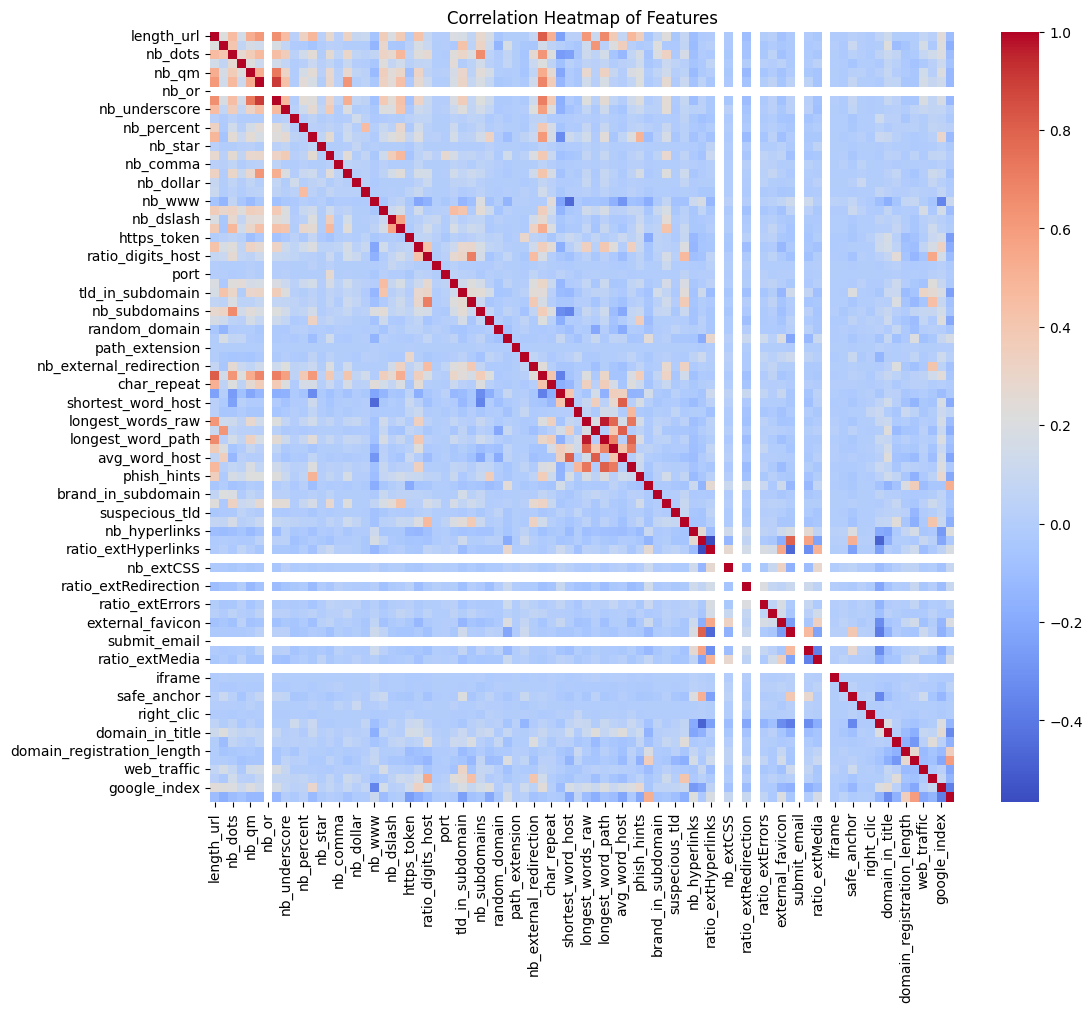

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
# Define the list of top TLDs to keep
top_tlds = ['com', 'org', 'net', 'app', 'uk']

# Filter the DataFrame to keep only rows where the 'tld' is in the top_tlds list
df = df[df['TLD'].isin(top_tlds)]

# Display the first few rows of the filtered DataFrame
display(df.head())

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,1,34,20,28,119,0,124,1,231
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,1,10,2,7,42,2,5,1,647
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,3,27,15,22,1,31,1,231
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,0,1,244,15,34,72,1,85,1,503
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,...,0,1,35,1,11,86,0,14,1,503


In [ ]:
df['TLD_encoded'] = label_encoder.fit_transform(df['TLD'])


display(df.head())

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,1,34,20,28,119,0,124,1,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,1,10,2,7,42,2,5,1,4
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,3,27,15,22,1,31,1,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,0,1,244,15,34,72,1,85,1,3
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,...,0,1,35,1,11,86,0,14,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151347 entries, 0 to 235794
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    151347 non-null  object 
 1   URL                         151347 non-null  object 
 2   URLLength                   151347 non-null  int64  
 3   Domain                      151347 non-null  object 
 4   DomainLength                151347 non-null  int64  
 5   IsDomainIP                  151347 non-null  int64  
 6   TLD                         151347 non-null  object 
 7   URLSimilarityIndex          151347 non-null  float64
 8   CharContinuationRate        151347 non-null  float64
 9   TLDLegitimateProb           151347 non-null  float64
 10  URLCharProb                 151347 non-null  float64
 11  TLDLength                   151347 non-null  int64  
 12  NoOfSubDomain               151347 non-null  int64  
 13  HasObfuscation     

In [ ]:
df['label'].unique()

array([1, 0])

In [ ]:
label_counts = df['label'].value_counts()
print(label_counts)

label
1    95520
0    55827
Name: count, dtype: int64


In [ ]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
count,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,...,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000
mean,32.997053,21.537057,0.000198,83.216985,0.884007,0.401878,0.058109,2.957746,1.066668,0.001196,...,0.027790,0.540678,28.276220,6.960112,11.648490,68.878663,2.539072,53.535458,0.631132,1.378997
std,38.289274,7.518565,0.014078,25.531405,0.192820,0.206732,0.009068,0.201169,0.478506,0.034562,...,0.164372,0.498344,84.999162,92.904573,23.640814,189.254658,20.012458,183.246240,0.482500,0.907321
min,14.000000,7.000000,0.000000,0.304877,0.000000,0.001502,0.006335,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,17.000000,0.000000,66.720000,0.800000,0.079963,0.054141,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,28.000000,20.000000,0.000000,100.000000,1.000000,0.522907,0.059698,3.000000,1.000000,0.000000,...,0.000000,1.000000,12.000000,3.000000,7.000000,27.000000,0.000000,14.000000,1.000000,1.000000
75%,33.000000,25.000000,0.000000,100.000000,1.000000,0.522907,0.064060,3.000000,1.000000,0.000000,...,0.000000,1.000000,32.000000,8.000000,17.000000,93.000000,1.000000,66.000000,1.000000,1.000000
max,4274.000000,105.000000,1.000000,100.000000,1.000000,0.522907,0.090824,3.000000,10.000000,1.000000,...,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000,4.000000


In [ ]:
df.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
235788,632917.txt,https://www.karibpan.com,23,www.karibpan.com,16,0,com,100.0,1.000000,0.522907,...,0,1,21,3,22,31,0,8,1,1
235789,179093.txt,https://www.life-in-ecuador.com,30,www.life-in-ecuador.com,23,0,com,100.0,0.533333,0.522907,...,0,1,43,1,16,42,0,44,1,1
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.0,1.000000,0.522907,...,0,1,51,7,21,187,2,191,1,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.0,0.785714,0.028555,...,0,0,50,1,7,88,0,31,1,4
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.0,1.000000,0.522907,...,0,1,21,6,18,256,0,261,1,1


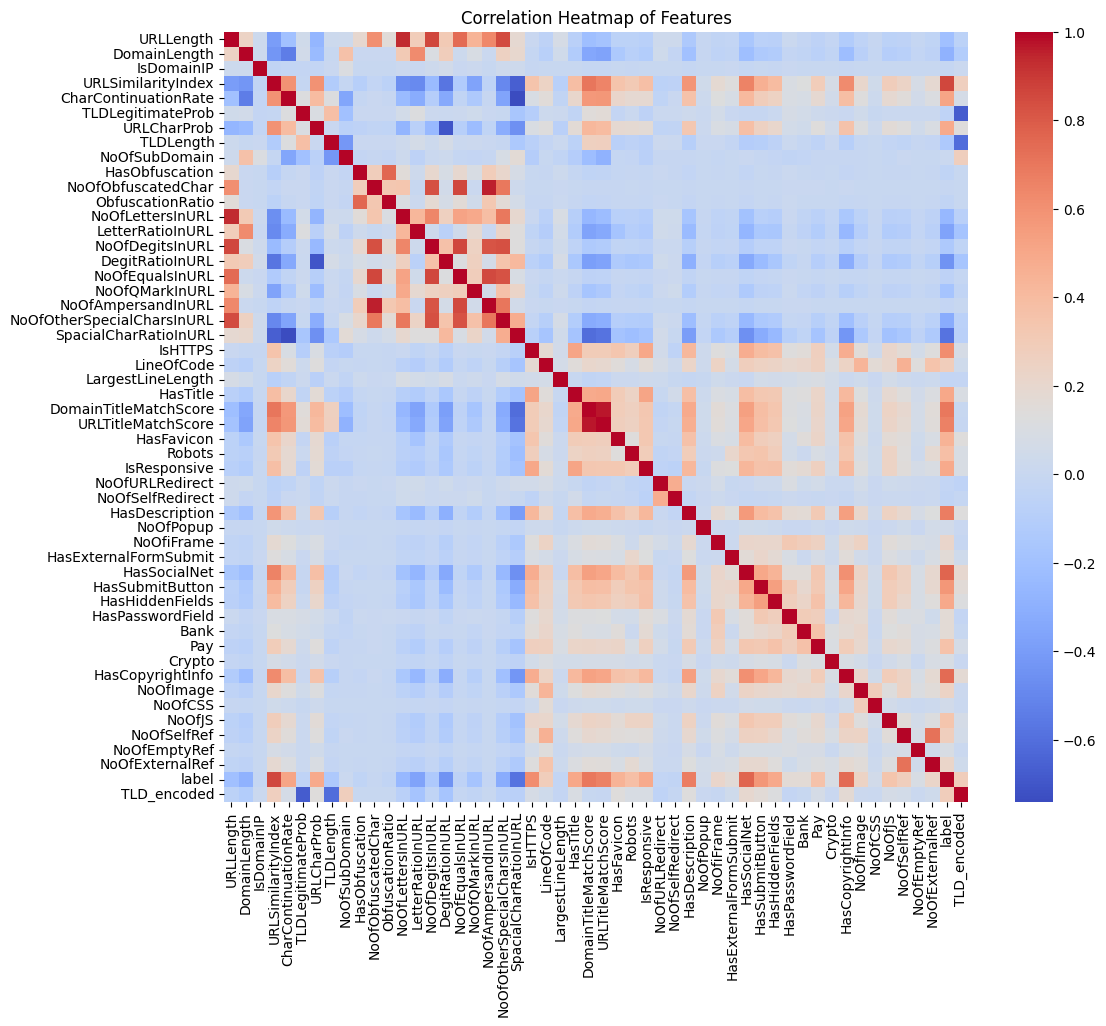

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
# Calculate absolute correlations with the 'label' column
abs_correlations = correlation_matrix['label'].abs().sort_values(ascending=False)

# Select the top 12 highly correlated columns (excluding 'label' itself)
top_25_features = abs_correlations[1:26].index.tolist()

# Include 'label' in the list of columns to keep
columns_to_keep = top_25_features + ['label']

print("Columns to keep:", columns_to_keep)

Columns to keep: ['URLSimilarityIndex', 'HasSocialNet', 'HasCopyrightInfo', 'DomainTitleMatchScore', 'HasDescription', 'URLTitleMatchScore', 'IsHTTPS', 'SpacialCharRatioInURL', 'HasSubmitButton', 'CharContinuationRate', 'HasTitle', 'HasHiddenFields', 'IsResponsive', 'URLCharProb', 'HasFavicon', 'DegitRatioInURL', 'Robots', 'LetterRatioInURL', 'Pay', 'NoOfJS', 'NoOfOtherSpecialCharsInURL', 'DomainLength', 'TLD_encoded', 'LineOfCode', 'NoOfSelfRef', 'label']


In [ ]:
# Drop the other columns from the DataFrame
df = df[columns_to_keep]

print("DataFrame updated with the top 25 features most correlated with 'label'.")
display(df.head())

DataFrame updated with the top 25 features most correlated with 'label'.


,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,DomainTitleMatchScore,HasDescription,URLTitleMatchScore,IsHTTPS,SpacialCharRatioInURL,HasSubmitButton,CharContinuationRate,...,Robots,LetterRatioInURL,Pay,NoOfJS,NoOfOtherSpecialCharsInURL,DomainLength,TLD_encoded,LineOfCode,NoOfSelfRef,label
0,100.0,0,1,0.000000,0,0.000000,1,0.032,1,1.000000,...,1,0.581,0,28,1,24,1,558,119,1
2,100.0,0,1,46.666667,1,46.666667,1,0.069,1,0.866667,...,1,0.517,0,7,2,22,4,467,42,1
3,100.0,1,1,0.000000,0,0.000000,1,0.038,1,1.000000,...,1,0.500,1,15,1,19,1,6356,22,1
4,100.0,1,1,100.000000,1,100.000000,1,0.030,1,1.000000,...,1,0.606,1,34,1,26,3,6089,72,1
5,100.0,1,1,0.000000,1,0.000000,1,0.033,0,1.000000,...,0,0.567,0,11,1,23,3,1210,86,1


In [ ]:
print(df['label'].value_counts())

label
1    95520
0    55827
Name: count, dtype: int64


In [ ]:
df.describe()

,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,DomainTitleMatchScore,HasDescription,URLTitleMatchScore,IsHTTPS,SpacialCharRatioInURL,HasSubmitButton,CharContinuationRate,...,Robots,LetterRatioInURL,Pay,NoOfJS,NoOfOtherSpecialCharsInURL,DomainLength,TLD_encoded,LineOfCode,NoOfSelfRef,label
count,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,...,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000,151347.000000
mean,83.216985,0.506036,0.540678,61.118042,0.488619,62.660133,0.818926,0.056941,0.446028,0.884007,...,0.288100,0.525108,0.276847,11.648490,2.021025,21.537057,1.378997,1237.605040,68.878663,0.631132
std,25.531405,0.499965,0.498344,48.491941,0.499872,48.093357,0.385081,0.030311,0.497080,0.192820,...,0.452879,0.109038,0.447442,23.640814,3.547905,7.518565,0.907321,3158.469953,189.254658,0.482500
min,0.304877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.056000,0.000000,0.000000,0.000000,7.000000,0.000000,2.000000,0.000000,0.000000
25%,66.720000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.037000,0.000000,0.800000,...,0.000000,0.458000,0.000000,0.000000,1.000000,17.000000,1.000000,49.000000,0.000000,0.000000
50%,100.000000,1.000000,1.000000,100.000000,0.000000,100.000000,1.000000,0.043000,0.000000,1.000000,...,0.000000,0.520000,0.000000,7.000000,1.000000,20.000000,1.000000,539.000000,27.000000,1.000000
75%,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.071000,1.000000,1.000000,...,1.000000,0.594000,1.000000,17.000000,2.000000,25.000000,1.000000,1387.000000,93.000000,1.000000
max,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.286000,1.000000,1.000000,...,1.000000,0.926000,1.000000,6957.000000,499.000000,105.000000,4.000000,422798.000000,27397.000000,1.000000


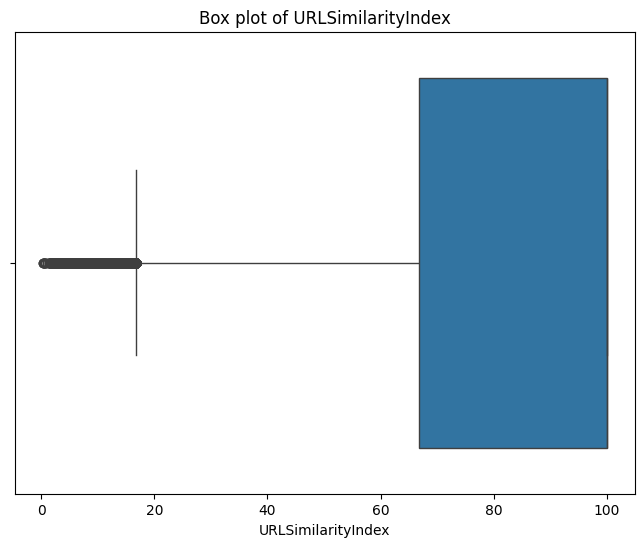

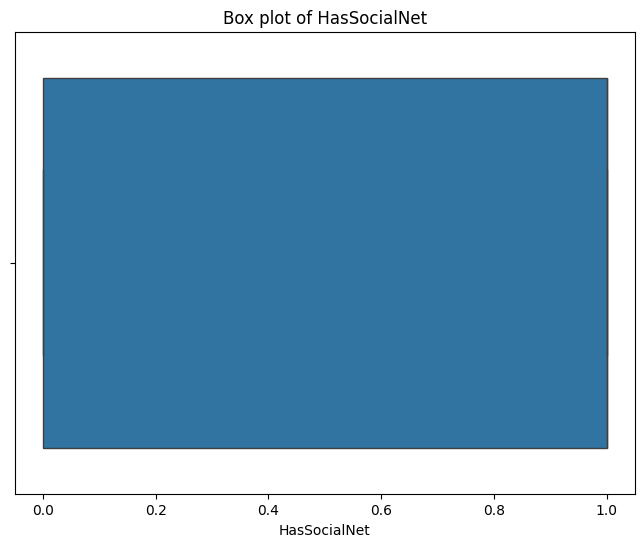

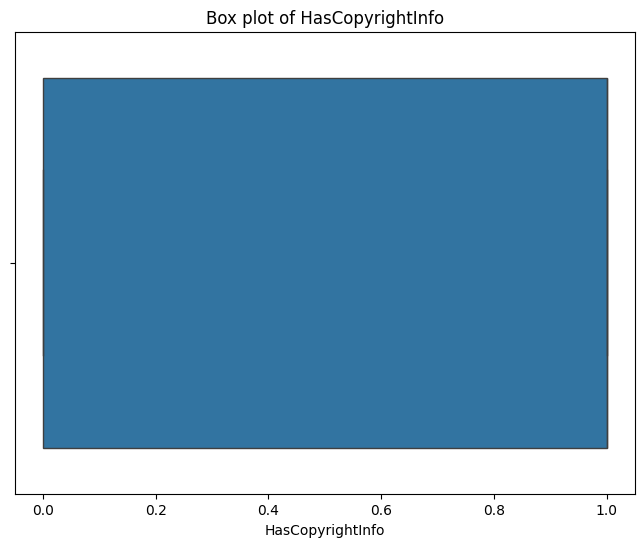

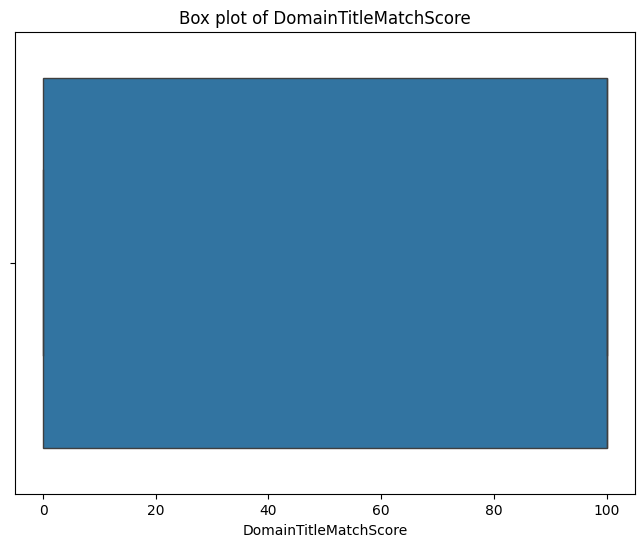

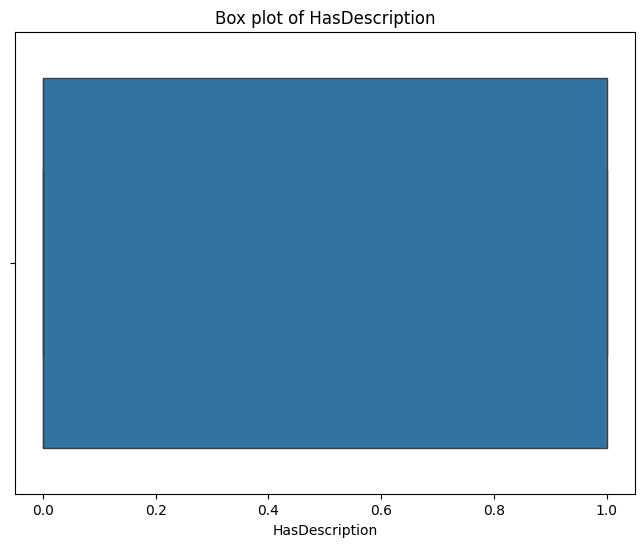

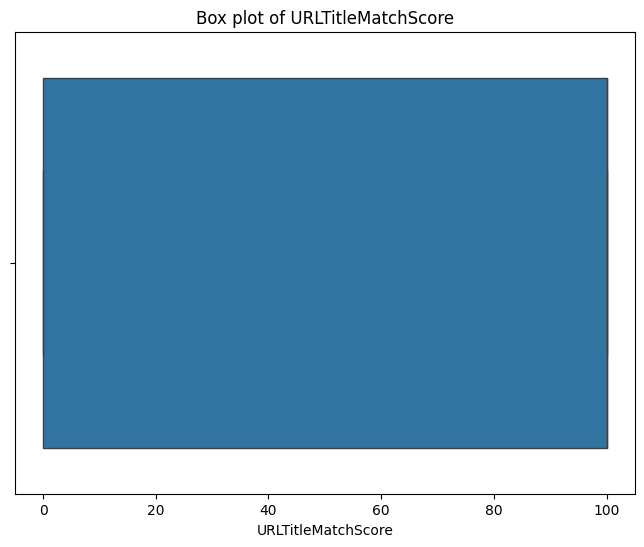

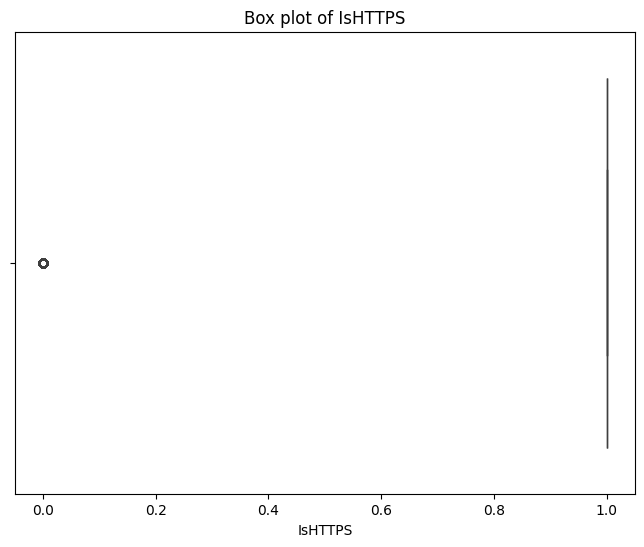

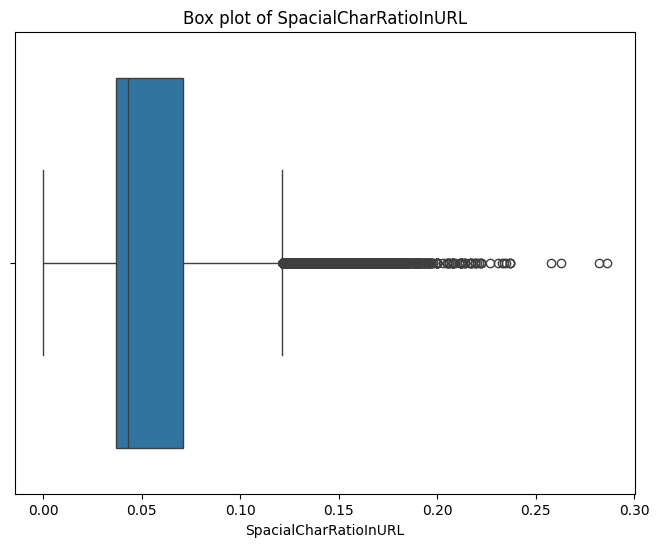

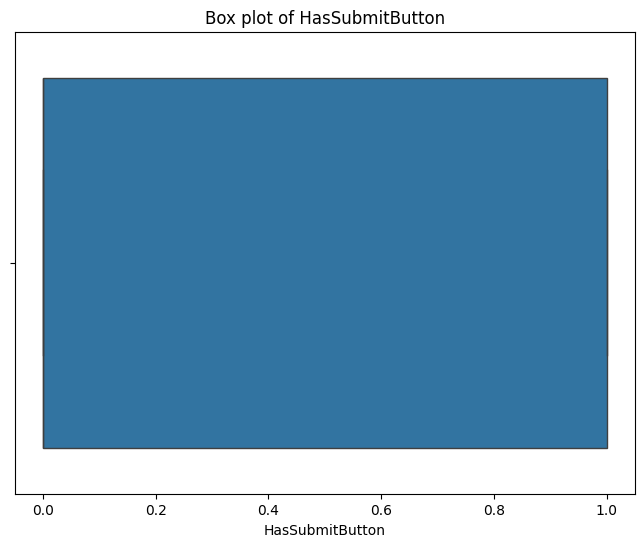

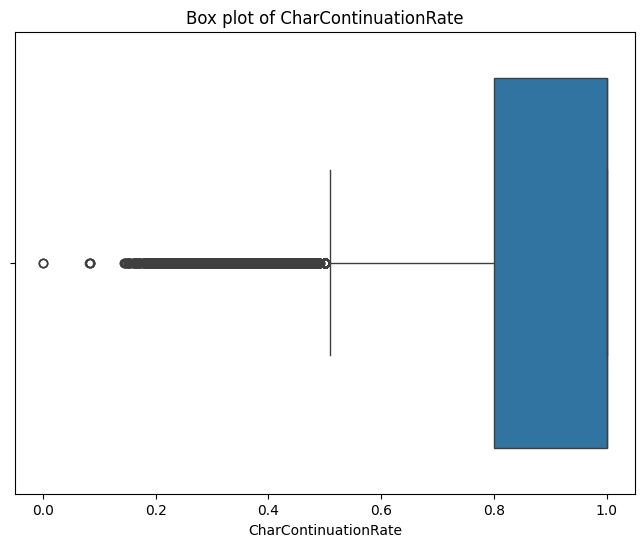

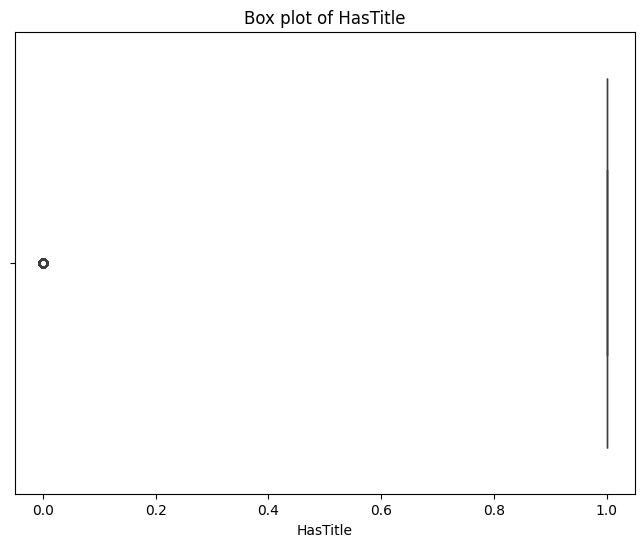

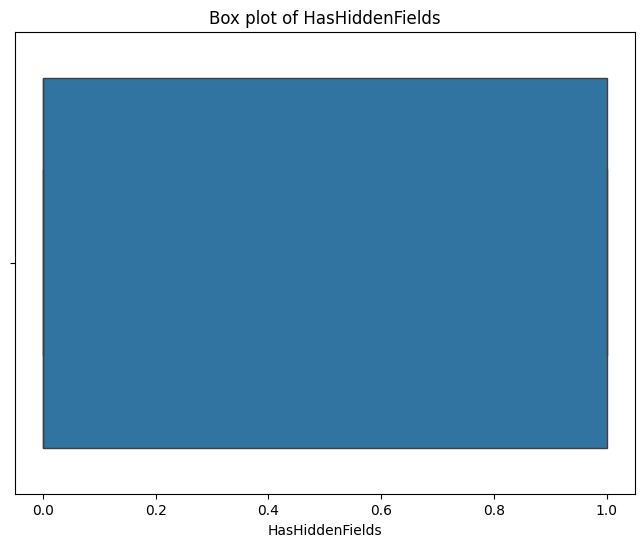

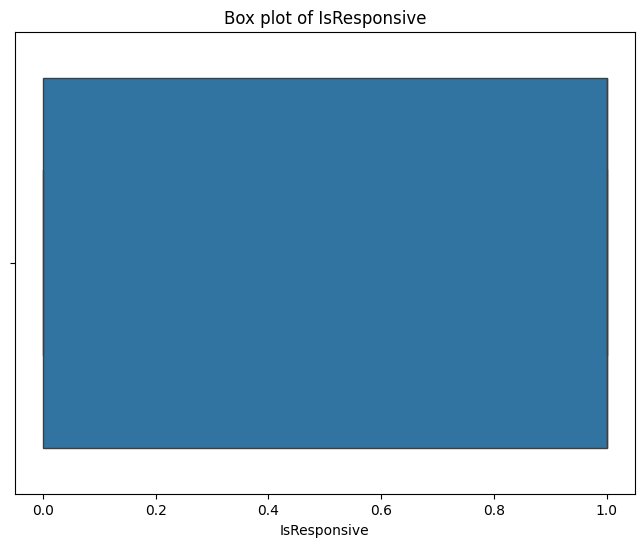

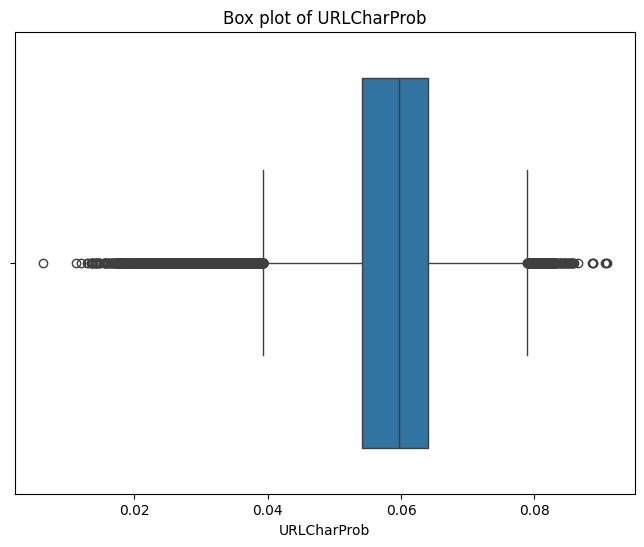

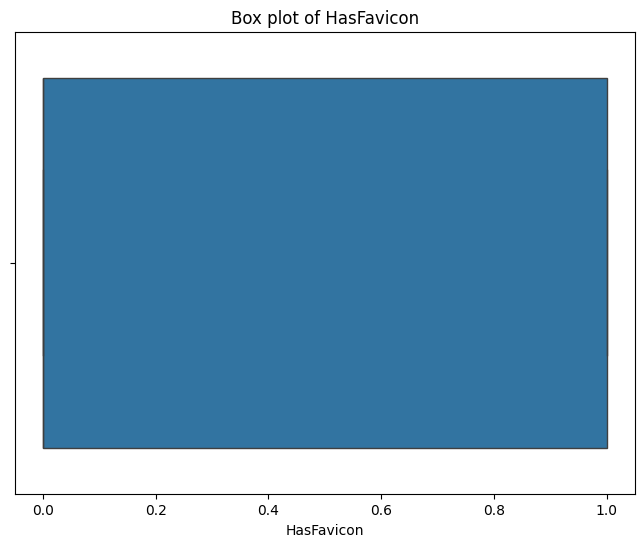

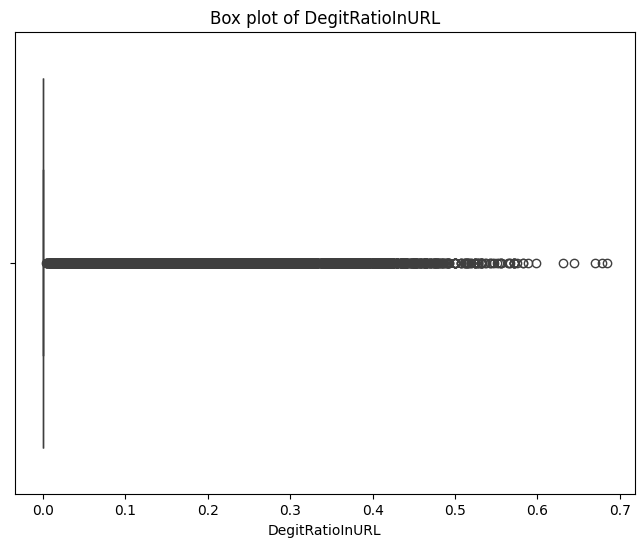

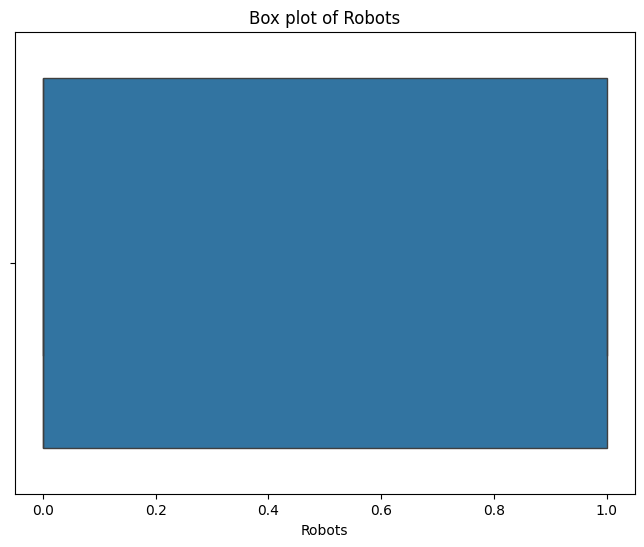

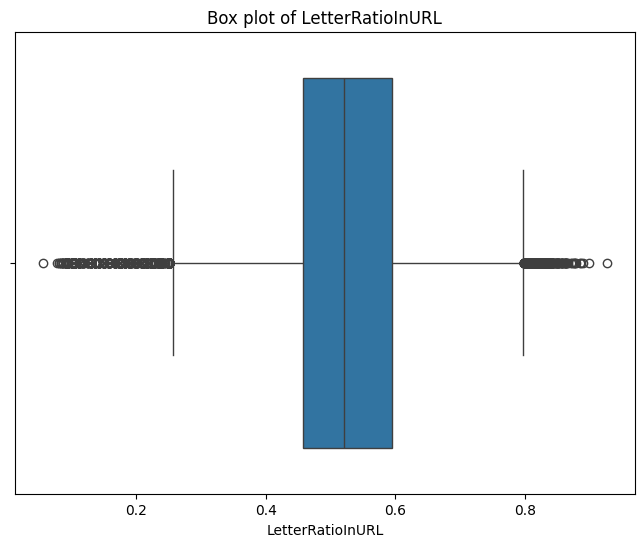

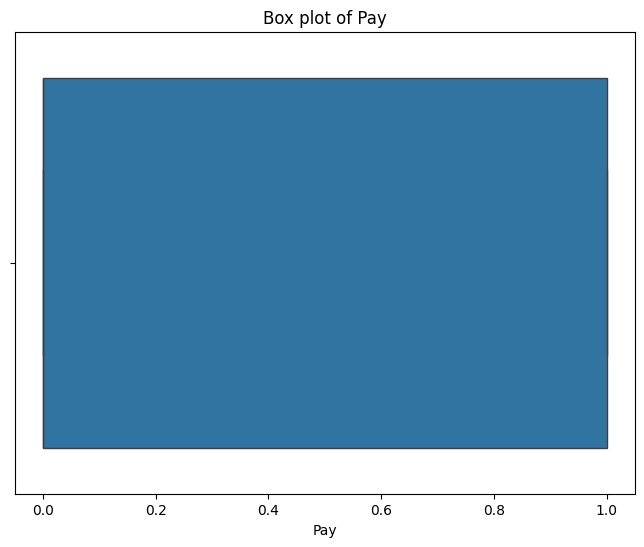

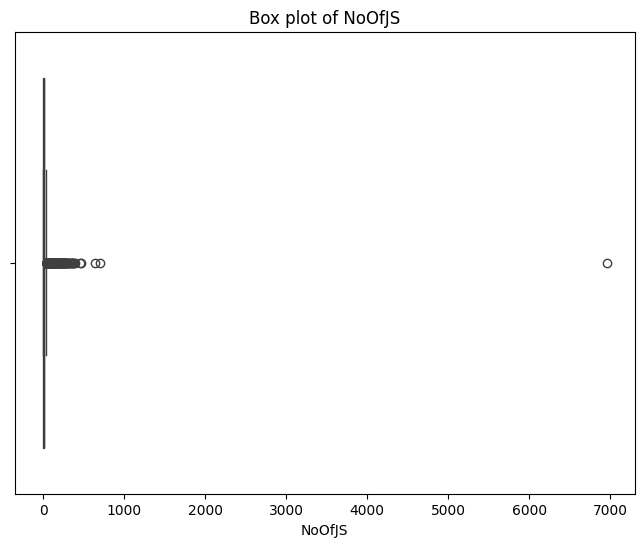

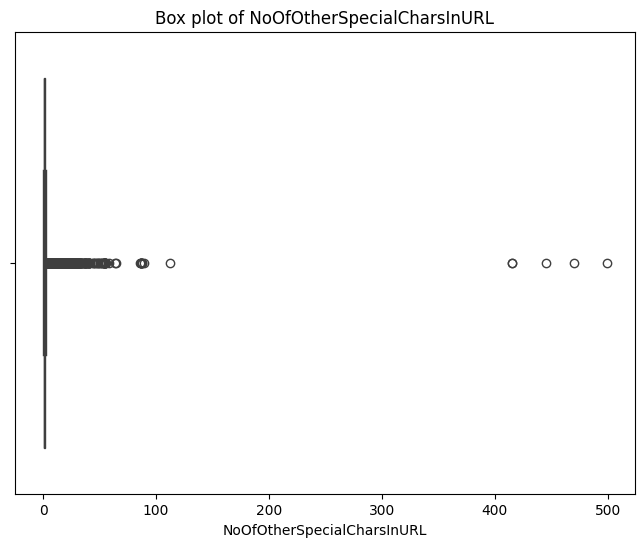

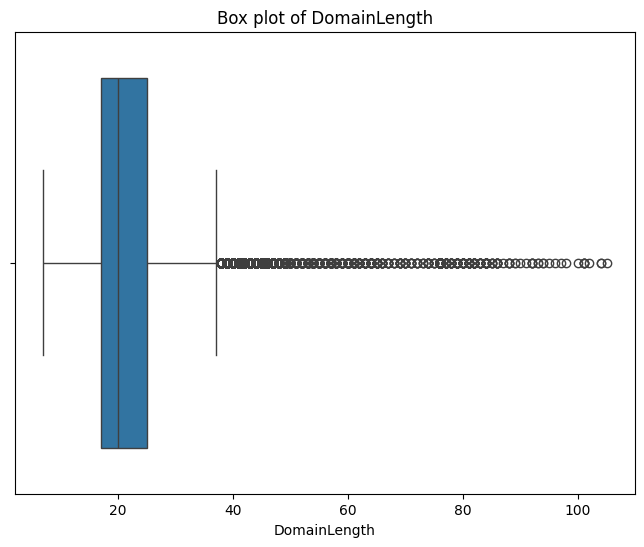

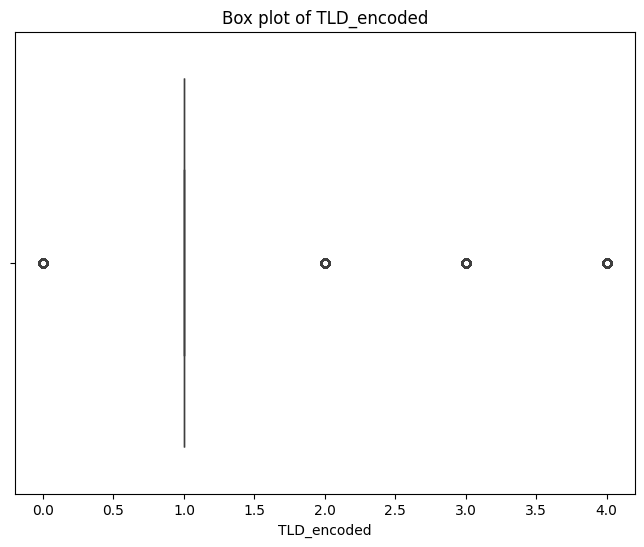

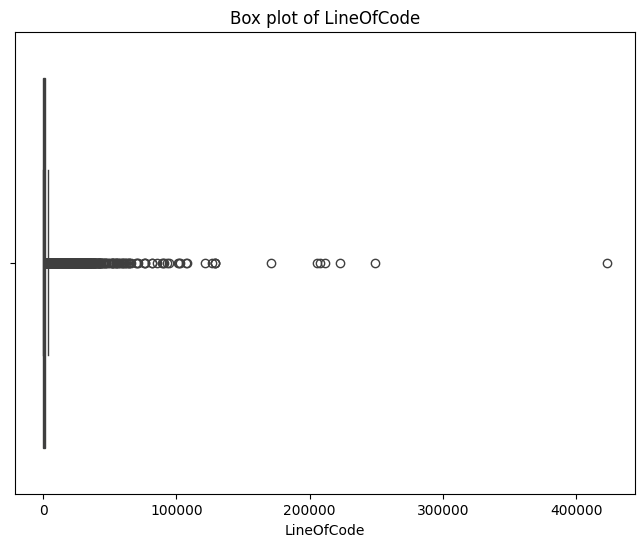

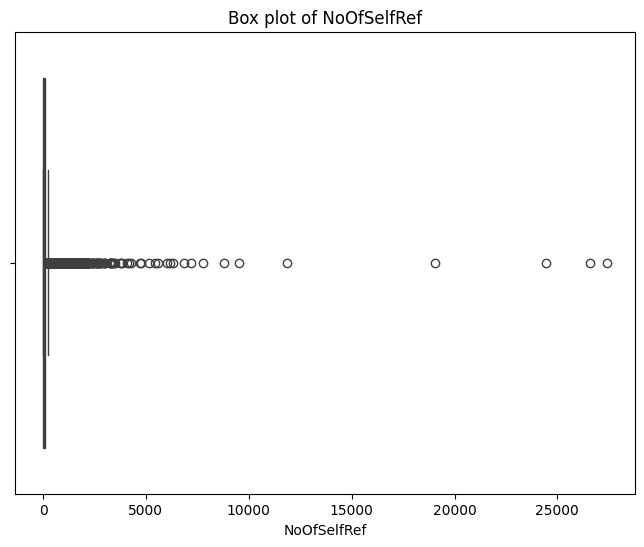

In [ ]:
for column in df.columns:
    if column != 'label':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')
        plt.show()

In [ ]:
# Identify columns for outlier removal based on previous box plots (excluding 'label')
columns_to_clean = [column for column in df.columns if column != 'label']

# Remove only extreme outliers using wider IQR bounds
for column in columns_to_clean:
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.0 * IQR
    upper_bound = Q3 + 3.0 * IQR
    before = len(df)
    # Filter out the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = len(df)
    print(f"Column {column}: removed {before - after} outliers")

print(f"Outliers removed. Dataset size: {len(df)}")

print("Outliers removed from the DataFrame based on IQR for the selected columns.")
display(df.head())

Column URLSimilarityIndex: removed 0 outliers
Column HasSocialNet: removed 0 outliers
Column HasCopyrightInfo: removed 0 outliers
Column DomainTitleMatchScore: removed 0 outliers
Column HasDescription: removed 0 outliers
Column URLTitleMatchScore: removed 0 outliers
Column IsHTTPS: removed 0 outliers
Column SpacialCharRatioInURL: removed 0 outliers
Column HasSubmitButton: removed 0 outliers
Column CharContinuationRate: removed 0 outliers
Column HasTitle: removed 0 outliers
Column HasHiddenFields: removed 0 outliers
Column IsResponsive: removed 0 outliers
Column URLCharProb: removed 0 outliers
Column HasFavicon: removed 0 outliers
Column DegitRatioInURL: removed 5 outliers
Column Robots: removed 0 outliers
Column LetterRatioInURL: removed 0 outliers
Column Pay: removed 0 outliers
Column NoOfJS: removed 53 outliers
Column NoOfOtherSpecialCharsInURL: removed 274 outliers
Column DomainLength: removed 6 outliers
Column TLD_encoded: removed 0 outliers
Column LineOfCode: removed 379 outliers


,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,DomainTitleMatchScore,HasDescription,URLTitleMatchScore,IsHTTPS,SpacialCharRatioInURL,HasSubmitButton,CharContinuationRate,...,Robots,LetterRatioInURL,Pay,NoOfJS,NoOfOtherSpecialCharsInURL,DomainLength,TLD_encoded,LineOfCode,NoOfSelfRef,label
0,100.0,0,1,0.000000,0,0.000000,1,0.032,1,1.000000,...,1,0.581,0,28,1,24,1,558,119,1
2,100.0,0,1,46.666667,1,46.666667,1,0.069,1,0.866667,...,1,0.517,0,7,2,22,4,467,42,1
3,100.0,1,1,0.000000,0,0.000000,1,0.038,1,1.000000,...,1,0.500,1,15,1,19,1,6356,22,1
4,100.0,1,1,100.000000,1,100.000000,1,0.030,1,1.000000,...,1,0.606,1,34,1,26,3,6089,72,1
5,100.0,1,1,0.000000,1,0.000000,1,0.033,0,1.000000,...,0,0.567,0,11,1,23,3,1210,86,1


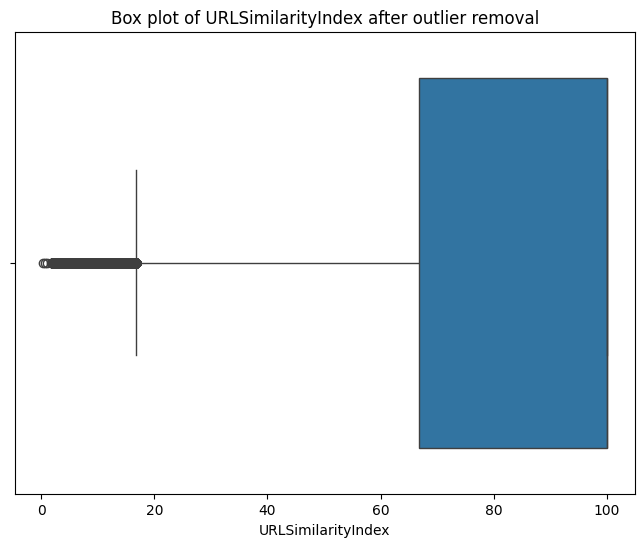

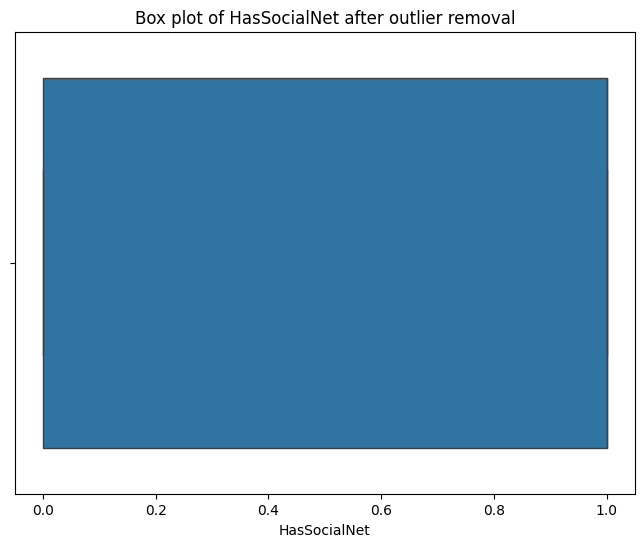

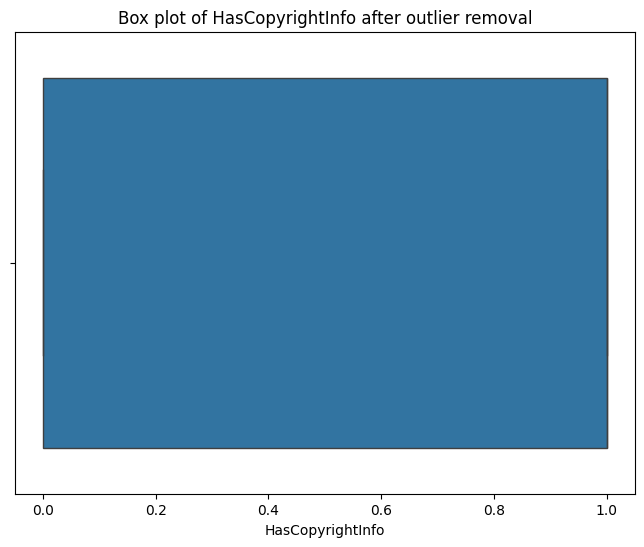

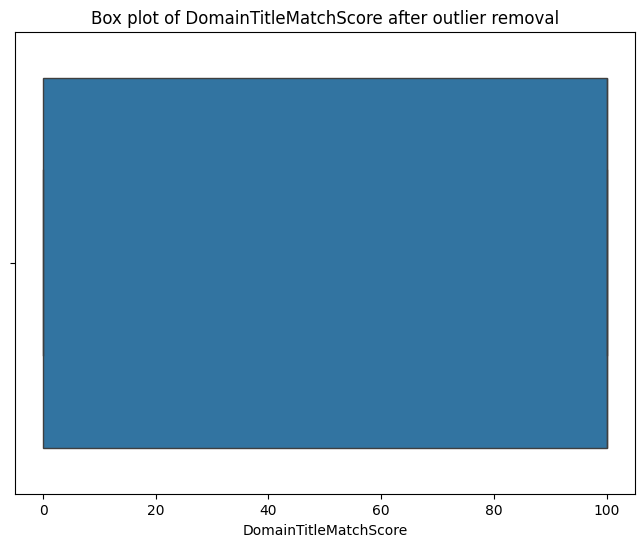

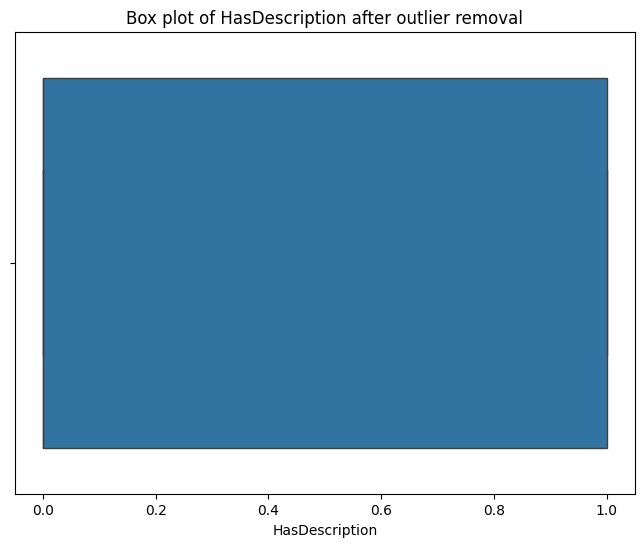

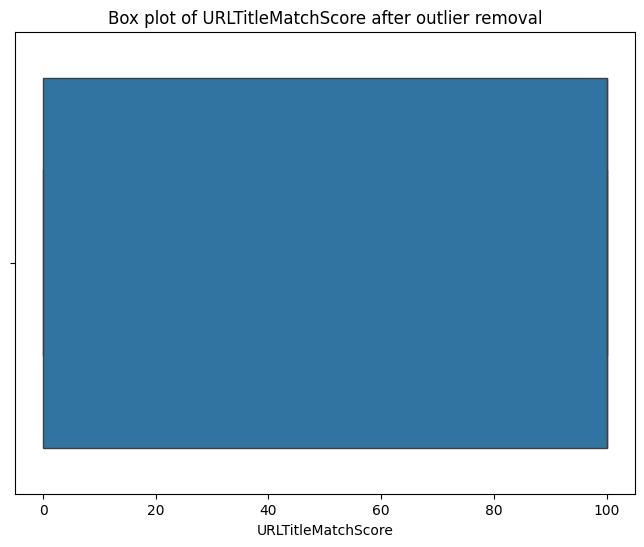

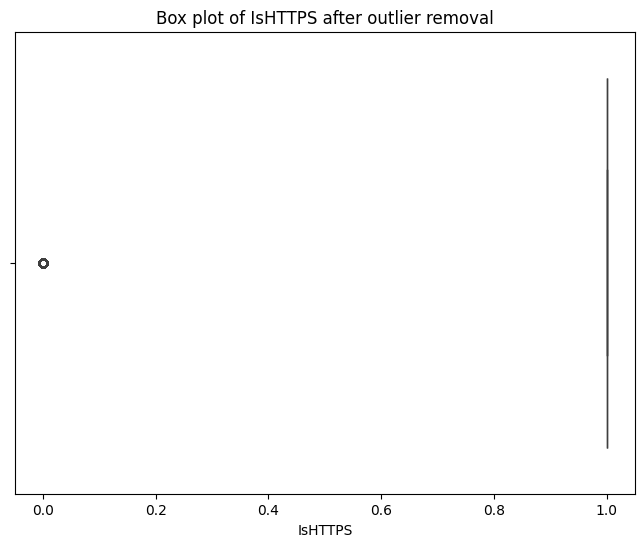

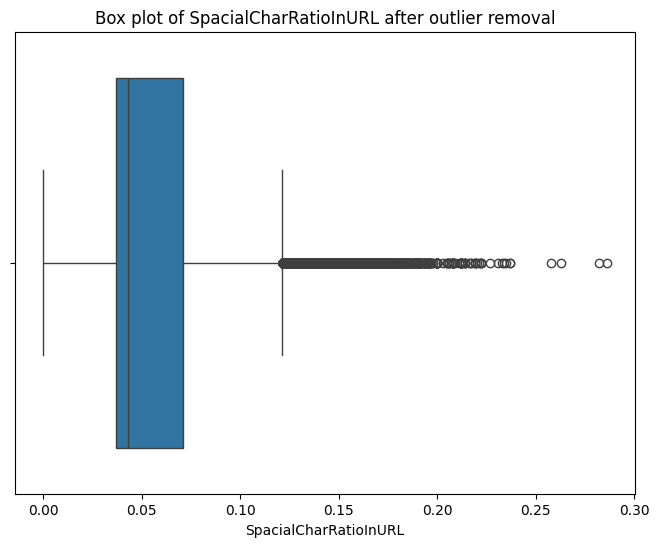

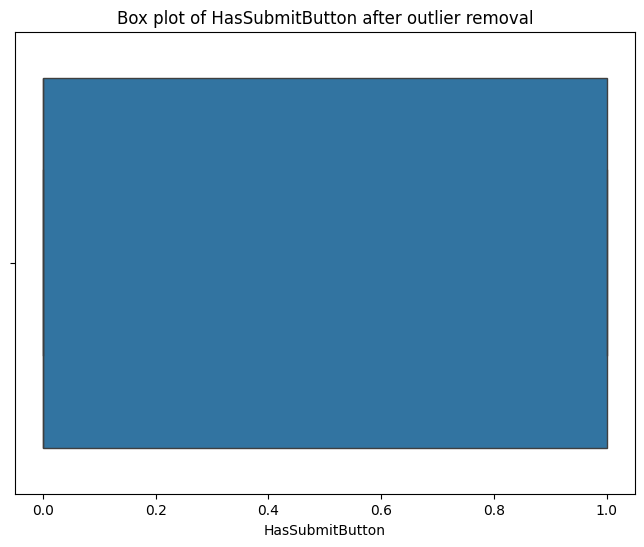

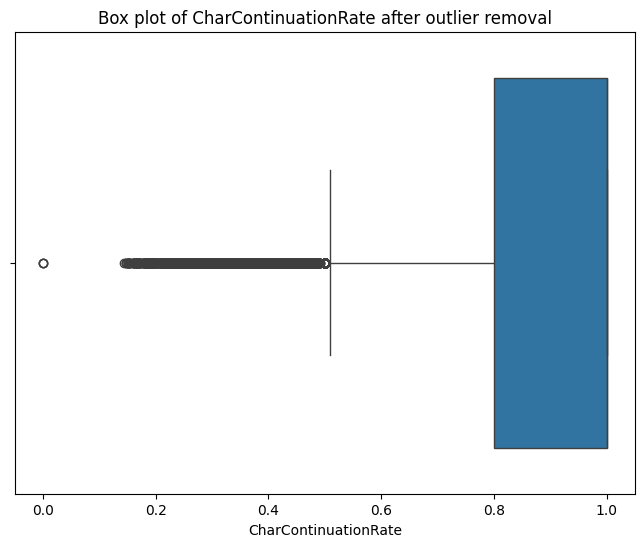

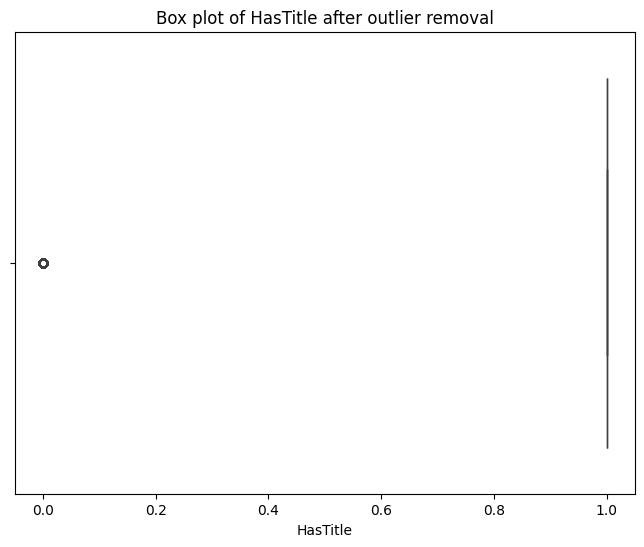

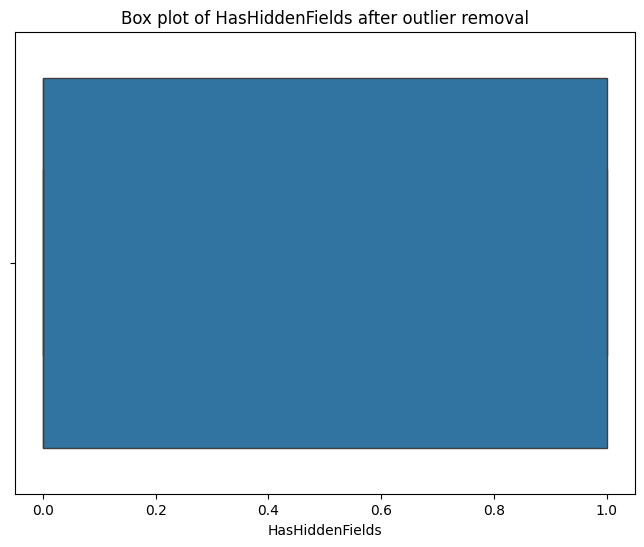

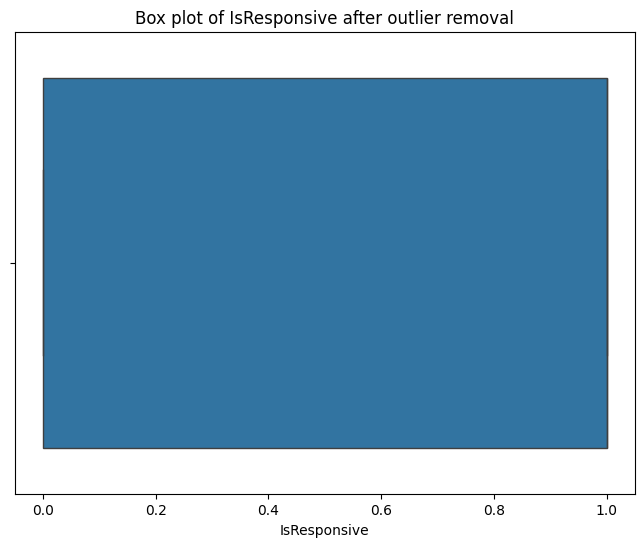

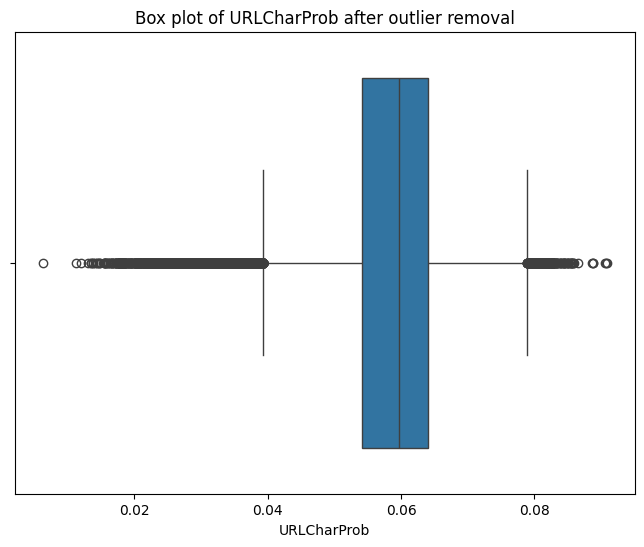

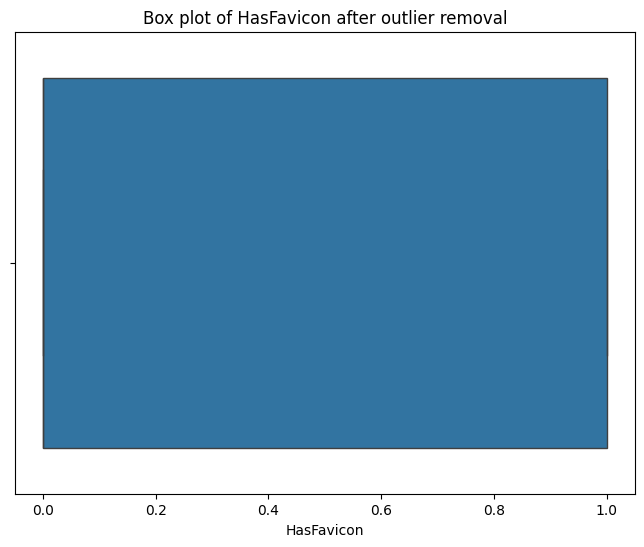

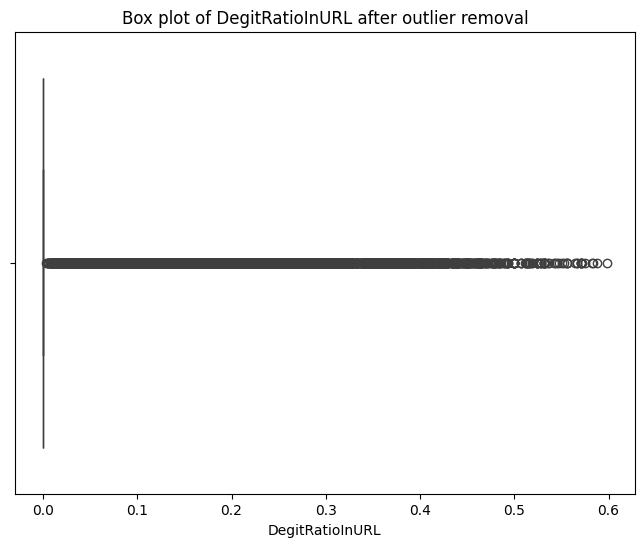

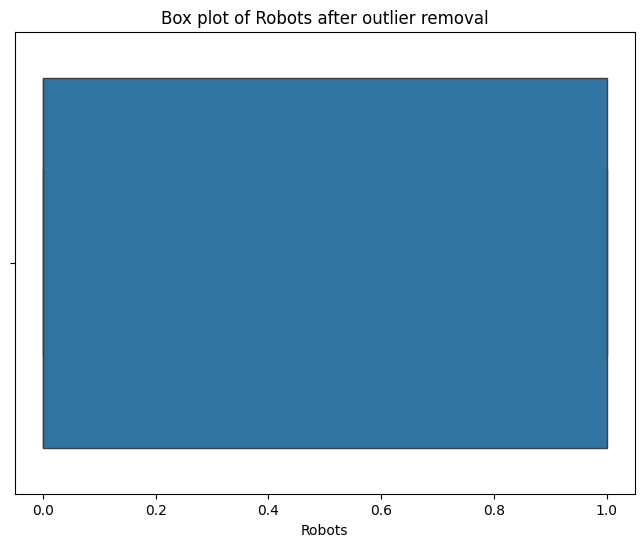

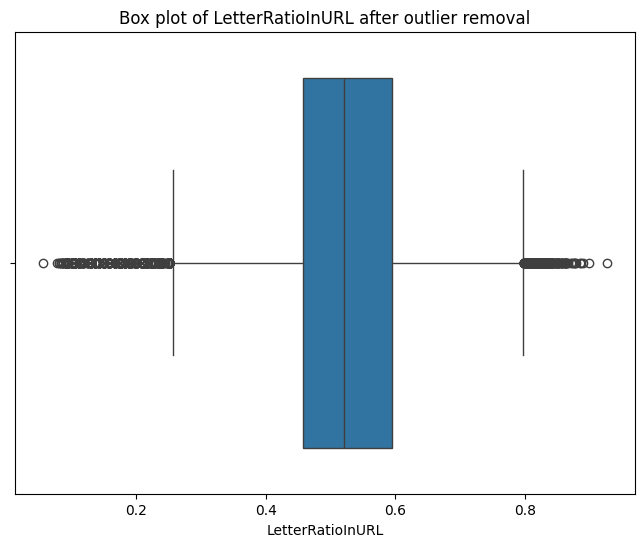

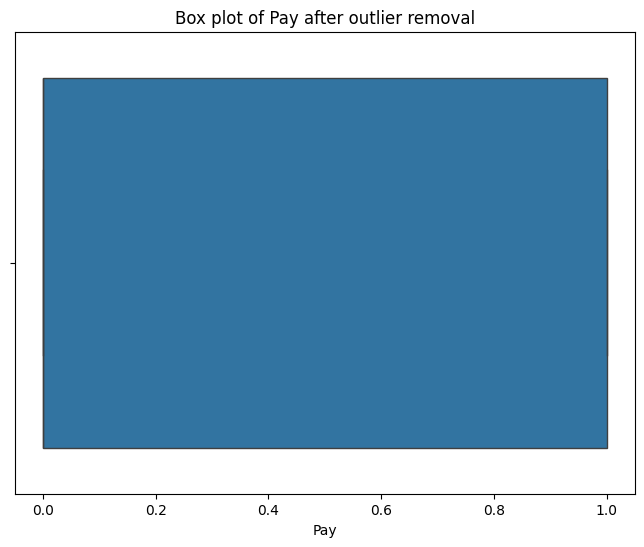

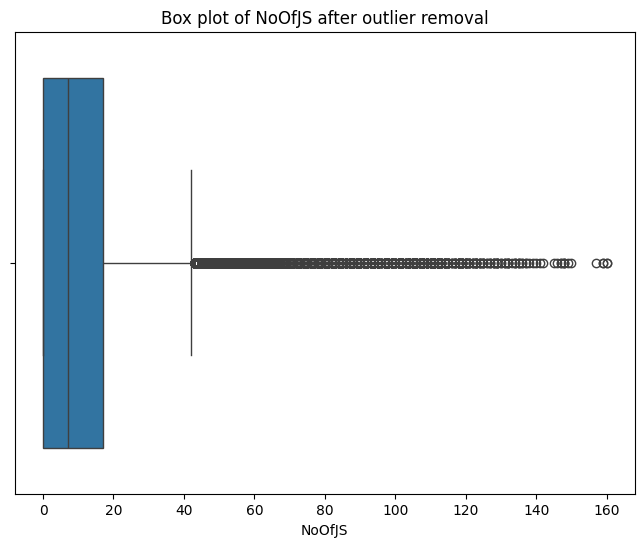

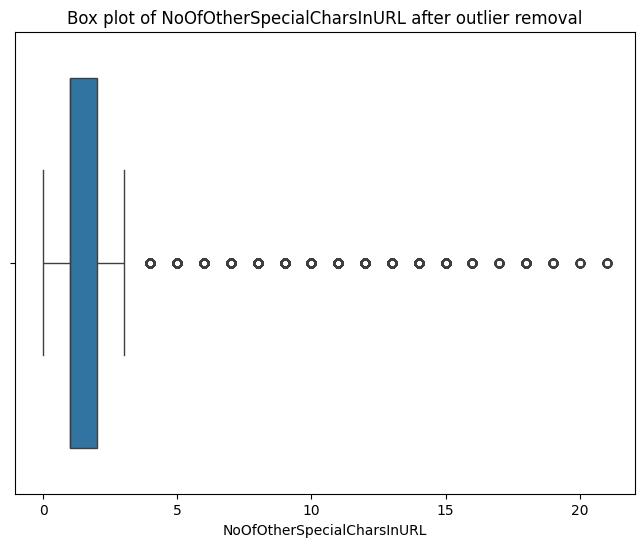

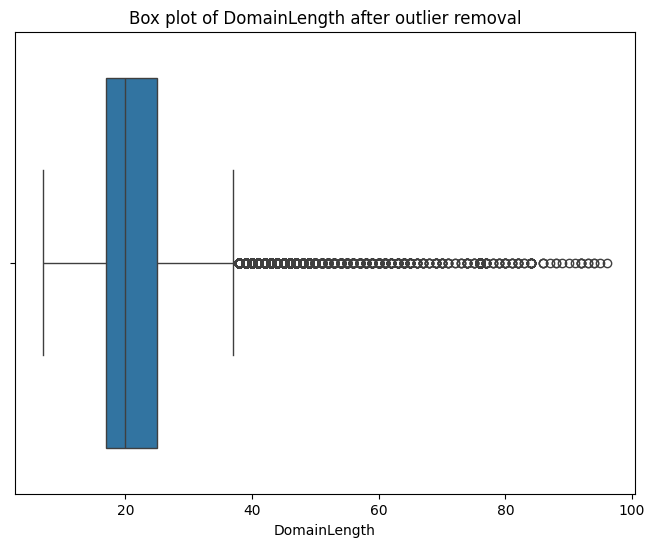

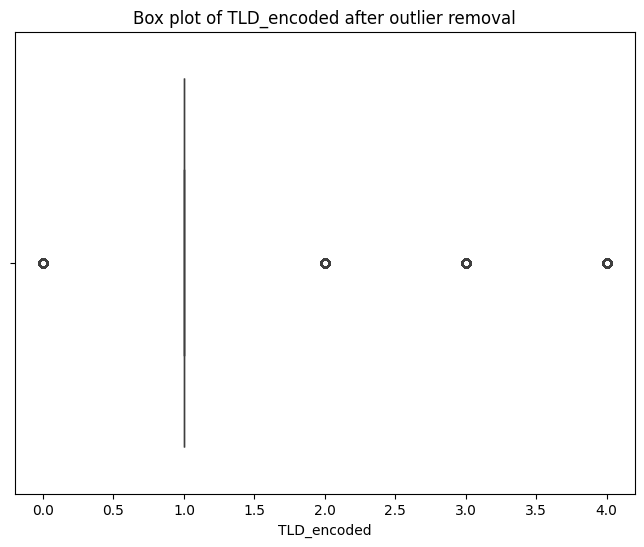

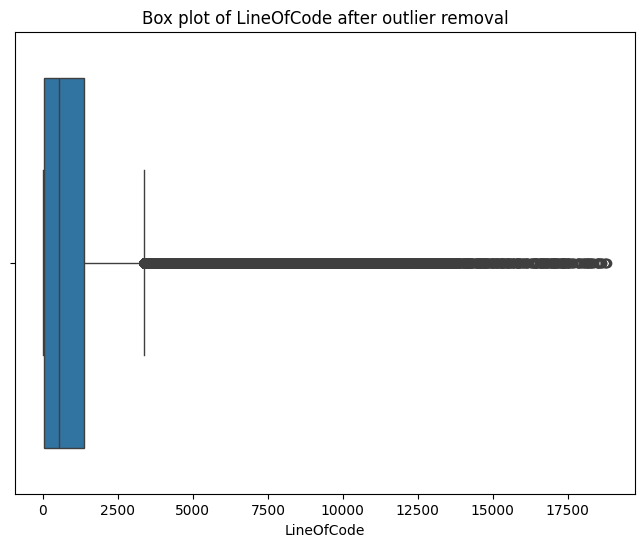

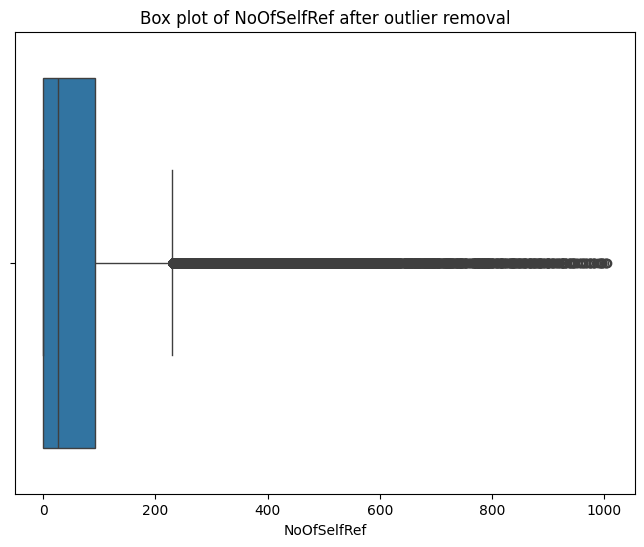

In [ ]:
for column in df.columns:
    if column != 'label':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column} after outlier removal')
        plt.show()

In [ ]:
df.describe()

,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,DomainTitleMatchScore,HasDescription,URLTitleMatchScore,IsHTTPS,SpacialCharRatioInURL,HasSubmitButton,CharContinuationRate,...,Robots,LetterRatioInURL,Pay,NoOfJS,NoOfOtherSpecialCharsInURL,DomainLength,TLD_encoded,LineOfCode,NoOfSelfRef,label
count,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,...,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000,150378.000000
mean,83.289484,0.505347,0.539979,61.115623,0.488143,62.664130,0.818105,0.056860,0.445012,0.884229,...,0.288706,0.525027,0.275000,11.472203,1.957241,21.505340,1.379364,1135.220810,64.137267,0.630657
std,25.359176,0.499973,0.498401,48.493088,0.499861,48.092316,0.385759,0.030156,0.496969,0.192232,...,0.453162,0.108985,0.446516,14.529908,2.015988,7.364737,0.908050,1838.949022,98.319157,0.482628
min,0.317642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.056000,0.000000,0.000000,0.000000,7.000000,0.000000,2.000000,0.000000,0.000000
25%,66.720000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.037000,0.000000,0.800000,...,0.000000,0.458000,0.000000,0.000000,1.000000,17.000000,1.000000,49.000000,0.000000,0.000000
50%,100.000000,1.000000,1.000000,100.000000,0.000000,100.000000,1.000000,0.043000,0.000000,1.000000,...,0.000000,0.520000,0.000000,7.000000,1.000000,20.000000,1.000000,536.000000,26.000000,1.000000
75%,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.071000,1.000000,1.000000,...,1.000000,0.594000,1.000000,17.000000,2.000000,25.000000,1.000000,1372.000000,92.000000,1.000000
max,100.000000,1.000000,1.000000,100.000000,1.000000,100.000000,1.000000,0.286000,1.000000,1.000000,...,1.000000,0.926000,1.000000,160.000000,21.000000,96.000000,4.000000,18798.000000,1004.000000,1.000000


In [ ]:
print(df['label'].value_counts())

label
1    94837
0    55541
Name: count, dtype: int64


## Train-test Splitting

In [ ]:

## Train-test Splitting
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Train-test split completed successfully.")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Train-test split completed successfully.
Training set size: (105264, 25)
Test set size: (45114, 25)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_model.fit(X_train, y_train)

print("KNN Classifier trained successfully.")

KNN Classifier trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


In [ ]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy of KNN Classifier: {accuracy_knn}")
print("Classification Report of KNN Classifier:")
print(report_knn)

Accuracy of KNN Classifier: 0.9992020215454183
Classification Report of KNN Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16718
           1       1.00      1.00      1.00     28396

    accuracy                           1.00     45114
   macro avg       1.00      1.00      1.00     45114
weighted avg       1.00      1.00      1.00     45114



## Fit and test with DT classifier

In [ ]:
## Fit and test with DT classifier - ADDED DECISION TREE
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
dt_model = DecisionTreeClassifier(max_depth=8, min_samples_split=20, min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


In [ ]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f"Accuracy of Decision Tree Classifier: {accuracy_dt}")
print("Classification Report of Decision Tree Classifier:")
print(report_dt)

Accuracy of Decision Tree Classifier: 1.0
Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16718
           1       1.00      1.00      1.00     28396

    accuracy                           1.00     45114
   macro avg       1.00      1.00      1.00     45114
weighted avg       1.00      1.00      1.00     45114



In [ ]:
## Fit and test with Random Forest - ADDED RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=15, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

print("Predictions made on the test set.")

Random Forest Classifier trained successfully.
Predictions made on the test set.


In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy of Random Forest Classifier: {accuracy_rf}")
print("Classification Report of Random Forest Classifier:")
print(report_rf)

# Compare all models
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Accuracy of Random Forest Classifier: 1.0
Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16718
           1       1.00      1.00      1.00     28396

    accuracy                           1.00     45114
   macro avg       1.00      1.00      1.00     45114
weighted avg       1.00      1.00      1.00     45114


MODEL COMPARISON SUMMARY
KNN Accuracy: 0.9992
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
